In [1]:

#In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological
#responses were then monitored over the course of that time. Your objective is to analyze the data to show how four
#treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

import csv
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

# read the Input Files 
clinical_trial_file = "raw_data/clinicaltrial_data.csv"
clinical_trial_data = pd.read_csv(clinical_trial_file)
clinical_trial_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
mouse_drug_file = "raw_data/mouse_drug_data.csv"
mouse_drug_data = pd.read_csv(mouse_drug_file)
mouse_drug_data.head(5)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


C:\Users\Beheshteh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


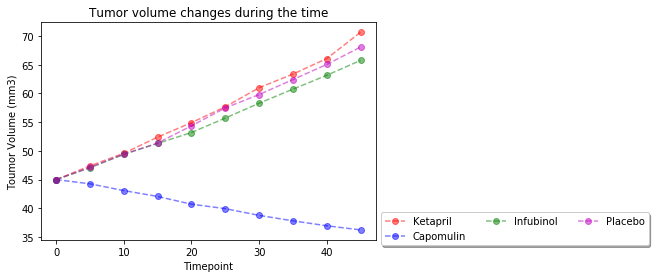

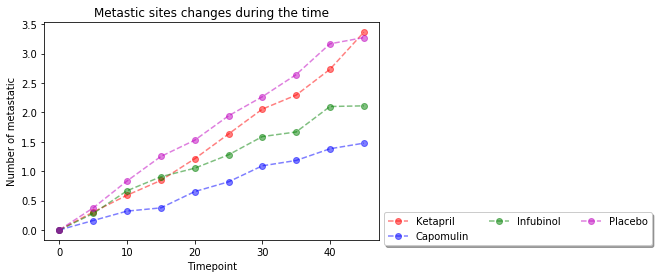

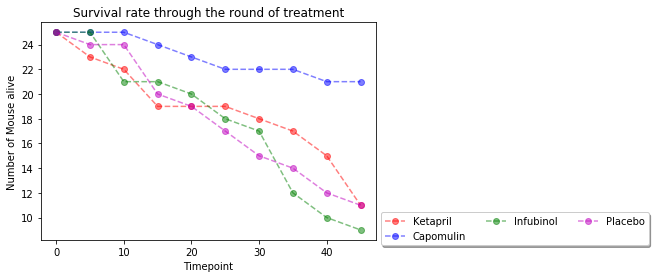

In [5]:
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis)
#(cancer spreading) sites changes over time for each treatment.
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

selected_drug = {'Capomulin', 'Infubinol', 'Ketapril', 'Placebo'}
colors = ['r', 'b', 'g', 'm']

fig1 = plt.figure() 
fig2 = plt.figure()
fig3 = plt.figure()

colorcount = 0


for drug in selected_drug:
    
        ax1 = fig1.add_subplot(111)
        ax2 = fig2.add_subplot(111)
        ax3 = fig3.add_subplot(111)
                     
        # finding all the mouses who used selected drugs and put them in the set list
        mouses = mouse_drug_data[mouse_drug_data.Drug == drug]
        mouses = set(mouses['Mouse ID'].values.tolist())
        
        # getting all the information of the mouse treated with selected drugs
        mouse_data = clinical_trial_data[clinical_trial_data['Mouse ID'].isin(mouses)]
        
        # calculating means for the Tumor volume
        means1 =  mouse_data.groupby(['Timepoint']).mean()["Tumor Volume (mm3)"]
        # error bars for the changes in the tumor volume during the time
            
        ax1.errorbar(mouse_data["Timepoint"].unique(), means1,
        fmt="--o", color=colors[colorcount], alpha=0.5, label= drug)
                
        # calculating means for the metastatic sites
        means2 = mouse_data.groupby(['Timepoint']).mean()["Metastatic Sites"]

        # error bars for the changes in the metastatic sites during the time
        ax2.errorbar(mouse_data["Timepoint"].unique(), means2,
        fmt="--o", color=colors[colorcount], alpha=0.5, label= drug)
         
        # scatter plot for the survival rate    
        mices = mouse_data.groupby(["Timepoint"]).count()["Mouse ID"]
        
        ax3.errorbar(mouse_data["Timepoint"].unique(), mices, 
        fmt="--o", color=colors[colorcount], alpha=0.5, label=drug)
        
        colorcount += 1

# error bars for the changes in the tumor volume during the time
ax1.set_xlabel("Timepoint")
ax1.set_ylabel("Toumor Volume (mm3)" )
ax1.legend(loc='center left', bbox_to_anchor=(1,.05),
          ncol=3, fancybox=True, shadow=True)
ax1.set_title('Tumor volume changes during the time')


# error bars for the changes in the metastatic sites during the time
ax2.set_xlabel("Timepoint")
ax2.set_ylabel("Number of metastatic" )
ax2.legend(loc='center left', bbox_to_anchor=(1,.05),
          ncol=3, fancybox=True, shadow=True)
ax2.set_title('Metastic sites changes during the time')

# error bar plot for the survival rate 
ax3.set_xlabel("Timepoint")
ax3.set_ylabel("Number of Mouse alive" )
ax3.legend(loc='center left', bbox_to_anchor=(1,.05),
          ncol=3, fancybox=True, shadow=True)
ax3.set_title('Survival rate through the round of treatment')

plt.show()        

        
 

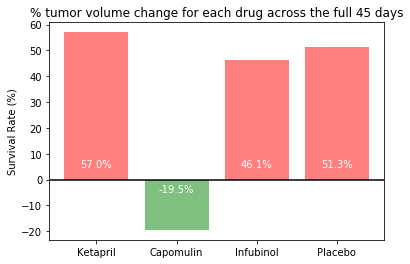

In [12]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

fig = plt.figure()
figsize=(60,10)
tick_locations = 0

for drug in selected_drug:
                
        # getting all the information of the mouse treated with selected drugs
             
        mouses = mouse_drug_data[mouse_drug_data.Drug == drug]
        mouses = set(mouses['Mouse ID'].values.tolist())
        
        # getting all the information of the mouse treated with selected drugs
        mouse_data = clinical_trial_data[clinical_trial_data['Mouse ID'].isin(mouses)]
        
        Tumor_data = mouse_data.groupby(['Timepoint']).mean()["Tumor Volume (mm3)"]
        percentTumorchange = ((Tumor_data[45] - Tumor_data[0])/Tumor_data[0]) * 100
        
        prcolor = ['r' if percentTumorchange > 0 else 'g']
        ycoor = [5 if percentTumorchange > 0 else -5]
        plt.bar(tick_locations, percentTumorchange, alpha=0.5, color=prcolor, align='center')    
        plt.text(tick_locations, ycoor[0], str(round(percentTumorchange, 1)) + '%', ha = 'center', color='w')
                 
        tick_locations +=1
    
    
tick_locations = np.arange(len(selected_drug))

plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
plt.xticks(tick_locations, selected_drug)
plt.ylabel('Survival Rate (%)')
plt.title('% tumor volume change for each drug across the full 45 days')        

plt.show()
        